In [0]:
# Read churn data into a Pandas dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('telco_churn.csv')

In [0]:
# Define input X and output y 

df['gender'] = df['gender'].astype('category')
df['gender_cat'] = df['gender'].cat.codes

df['InternetService'] = df['InternetService'].astype('category')
df['InternetService_cat'] = df['InternetService'].cat.codes

df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineSecurity_cat'] = df['OnlineSecurity'].cat.codes

df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)
cols = ['MonthlyCharges', 'tenure', 'gender_cat', 'InternetService_cat', 'OnlineSecurity_cat']

X = df[cols]
y = df['Churn']
     

In [0]:
'''
Define CustomClassifier that inherits from Scikit-learn's RandomForestClassifier   
'''

from sklearn.ensemble import RandomForestClassifier

class CustomClassifier(RandomForestClassifier):
   pass


In [0]:
# USE CASE: Extending the functionality of classes that are a part of an existing machine learning package: scikitlearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

class CustomClassifier(RandomForestClassifier):
    def __init__(self, test_size=0.2 , random_state=42, **kwargs):
        super().__init__(**kwargs)
        self.test_size = test_size
        self.random_state = random_state
        
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state= self.random_state)
        return (self.X_train, self.X_test, self.y_train, self.y_test)   

In [0]:
# Create an instance and check for attributes created
rf_model = CustomClassifier(0.4, 14)
print(rf_model.__dict__.keys())

rf_model.split_data()
print(rf_model.__dict__.keys())

dict_keys(['base_estimator', 'n_estimators', 'estimator_params', 'bootstrap', 'oob_score', 'n_jobs', 'random_state', 'verbose', 'warm_start', 'class_weight', 'max_samples', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'ccp_alpha', 'test_size'])
dict_keys(['base_estimator', 'n_estimators', 'estimator_params', 'bootstrap', 'oob_score', 'n_jobs', 'random_state', 'verbose', 'warm_start', 'class_weight', 'max_samples', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'ccp_alpha', 'test_size', 'X_train', 'X_test', 'y_train', 'y_test'])


In [0]:
# dir: returns all the properties and methods of a specified object
dir(CustomClassifier)

Out[7]: ['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_gorilla_active_patch',
 '_gorilla_active_patch_fit',
 '_gorilla_active_patch_predict',
 '_gorilla_active_patch_predict_log_proba',
 '_gorilla_active_patch_predict_proba',
 '_gorilla_active_patch_score',
 '_gorilla_original_fit',
 '_gorilla_original_predict',
 '_gorilla_original_predict_log_proba',
 '_gorilla_original_predict_pro

In [0]:
# Let's understand our child class by printing the attributes and methods of our child class
attributes = CustomClassifier.__dict__.keys()
print(attributes)

dict_keys(['__module__', '__init__', 'split_data', '__doc__', '__abstractmethods__', '_abc_impl'])


In [0]:
# Let's call a method of the parent class : RFClassifier:  fit
rf_model.fit(rf_model.X_train, rf_model.y_train)

Out[9]: CustomClassifier(random_state=14, test_size=0.4)

In [0]:
# We can also access random forest classifier class attributes in addition to methods!
importances = dict(zip(rf_model.feature_names_in_, rf_model.feature_importances_))
print("Feature Importances: ", importances)
     

Feature Importances:  {'MonthlyCharges': 0.5078921486183098, 'tenure': 0.3459946963263228, 'gender_cat': 0.01885597407518725, 'InternetService_cat': 0.04410741966853665, 'OnlineSecurity_cat': 0.08314976131164357}


In [0]:
# USE CASE 2: Extending a Custom Parent Class functionality with a child class.

class Model(CustomClassifier):
    
    def __init__(self):
        self.n_estimators = 10
        self.max_depth = 10
        super().__init__()
        self.X_train, self.X_test, self.y_train, self.y_test = super().split_data()
        self.model = super().fit( self.X_train, self.y_train)
        self.y_pred = super().predict(self.X_test)

     
            

In [0]:
model_obj = Model()

print(model_obj.__dict__.keys())

dict_keys(['n_estimators', 'max_depth', 'base_estimator', 'estimator_params', 'bootstrap', 'oob_score', 'n_jobs', 'random_state', 'verbose', 'warm_start', 'class_weight', 'max_samples', 'criterion', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'ccp_alpha', 'test_size', 'X_train', 'X_test', 'y_train', 'y_test', 'feature_names_in_', 'n_features_in_', 'n_outputs_', 'classes_', 'n_classes_', 'base_estimator_', 'estimators_', '_mlflow_run_id', 'model', 'y_pred'])


In [0]:
# This child class will inherit the method and attributes of our Model class
from sklearn.metrics import confusion_matrix
import seaborn as sns

class ModelVisualization(Model):
    def __init__(self):
        super().__init__()

    # the following method: generate_confusion_matrix is callable once .fit() and .predict() from Model class have been run    
    def generate_confusion_matrix(self):
        cm = confusion_matrix(self.y_test, self.y_pred)
        cm = cm / cm.astype(np.float).sum(axis=1)
        sns.heatmap(cm, annot=True, cmap='Blues')

<command-1338408208901460>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm / cm.astype(np.float).sum(axis=1)


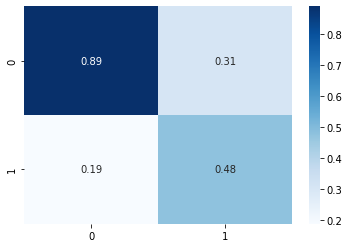

In [0]:
results = ModelVisualization()

results.generate_confusion_matrix()

In [0]:
#checkout method resolution order
ModelVisualization.__mro__

Out[16]: (__main__.ModelVisualization,
 __main__.Model,
 __main__.CustomClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.ensemble._forest.ForestClassifier,
 sklearn.base.ClassifierMixin,
 sklearn.ensemble._forest.BaseForest,
 sklearn.base.MultiOutputMixin,
 sklearn.ensemble._base.BaseEnsemble,
 sklearn.base.MetaEstimatorMixin,
 sklearn.base.BaseEstimator,
 object)